#### Бізнес задача: сегментувати клієнтів згідно їх характеристик (при цьому визначити кількість сегментів). 

Вхідні данні:

» Файл features.csv містить опис 17 195 абонентів по 46 показникам за 6 місяців до підрахунку цільової змінної. ID – ідентифікатор абонента. MONTH_NUM_FROM_EVENT – порядковий номер місяця від формування цільової змінної (де 1 місяць описує найновіші дані, 6 місяць описує найстаріші дані). F1 – інформація про перший показник. F2 – інформація про другий показник. І т.д.

In [1]:
# імпортуємо необхідні бібліотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Завантеження данних

In [2]:
# завантажемо данні
features = pd.read_csv('D:/data_sets/Kyivstar/BigDataSchool_features.csv', index_col = 0)
# train_set = pd.read_csv('D:/data_sets/Kyivstar/BigDataSchool_train_set.csv', index_col = 0)

In [3]:
# Замінемо пропущені данні (NaN) на 0.
features = features.fillna(0)

#Залишаємо лише останній місяць в данних
features_last_months = features[features.MONTH_NUM_FROM_EVENT == 1]

In [4]:
features_last_months.head()

,MONTH_NUM_FROM_EVENT,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47
ID,,,,,,,,,,,,,,,,,,,,,
2,1,4.0,133.0,28.0,0.0,0.0,0.00,518.98,2.60,151.33,...,89.0,137.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,958.0
4,1,5.0,139.0,29.0,7.0,0.0,682.90,676.53,3.53,591.27,...,0.0,130.0,2.0,2.0,4.0,0.0,2.0,0.0,1.0,866.0
5,1,20.0,19.0,22.0,0.0,1.0,137.98,55.78,36.03,115.33,...,44.0,12.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,146.0
8,1,21.0,134.0,29.0,21.0,1.0,459.90,408.58,11.92,485.28,...,59.0,137.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0,1201.0
9,1,20.0,9.0,28.0,28.0,0.0,813.60,628.88,181.68,391.65,...,182.0,142.0,0.0,1.0,4.0,0.0,1.0,1.0,2.0,34688.0


In [5]:
# нормалізуємо данні до застосування методу аналізу головних компонент (PCA)
from sklearn import preprocessing
normalized_X = preprocessing.normalize(features_last_months)

Використаємо метод аналізу головних компонент (PCA) для зниження розмірності массиву

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(normalized_X)
pca_samples = pca.transform(normalized_X)

In [7]:
print(pca_samples[0:10])

[[-0.19173605  0.33742189  0.07087849]
 [-0.31385688 -0.20626059  0.07397913]
 [-0.18733822 -0.08633912  0.10942895]
 [-0.28875534  0.09353236 -0.02108371]
 [-0.03434673  0.71569617  0.10813303]
 [-0.19718759 -0.28757565  0.09235453]
 [-0.25581516 -0.24561679 -0.16111951]
 [-0.27941061  0.34079414 -0.11975413]
 [-0.08339205 -0.24010683  0.66079398]
 [-0.26530796 -0.2265845   0.28128581]]


In [8]:
ps = pd.DataFrame(pca_samples)
ps.head(10)

,0,1,2
0,-0.191736,0.337422,0.070878
1,-0.313857,-0.206261,0.073979
2,-0.187338,-0.086339,0.109429
3,-0.288755,0.093532,-0.021084
4,-0.034347,0.715696,0.108133
5,-0.197188,-0.287576,0.092355
6,-0.255815,-0.245617,-0.161120
7,-0.279411,0.340794,-0.119754
8,-0.083392,-0.240107,0.660794
9,-0.265308,-0.226585,0.281286


Візуалізуємо масив у тривимірному просторі

In [9]:
tocluster = pd.DataFrame(ps[[0,1,2]])

In [10]:
from mpl_toolkits.mplot3d import Axes3D

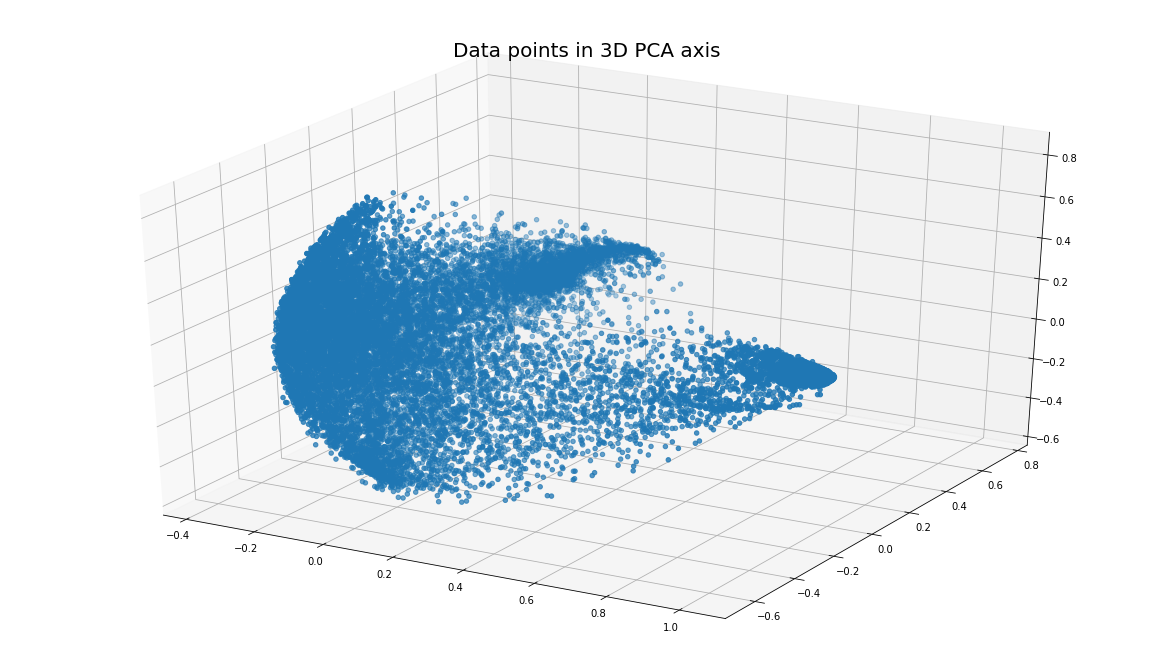

In [11]:
plt.rcParams['figure.figsize'] = (16, 9)


fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[1], tocluster[2])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

Схоже можливо виділити три сегменти клієнтів, але можливо їх більше. Проведемо дослідження по кількості можливих cегментів - оцінемо, наприклад, можливість існування 8 сегментів:

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))
    

In [13]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

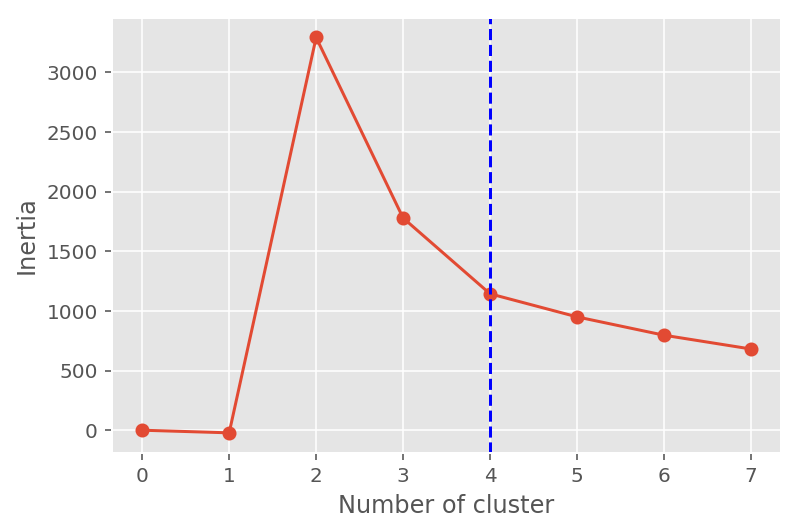

In [14]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

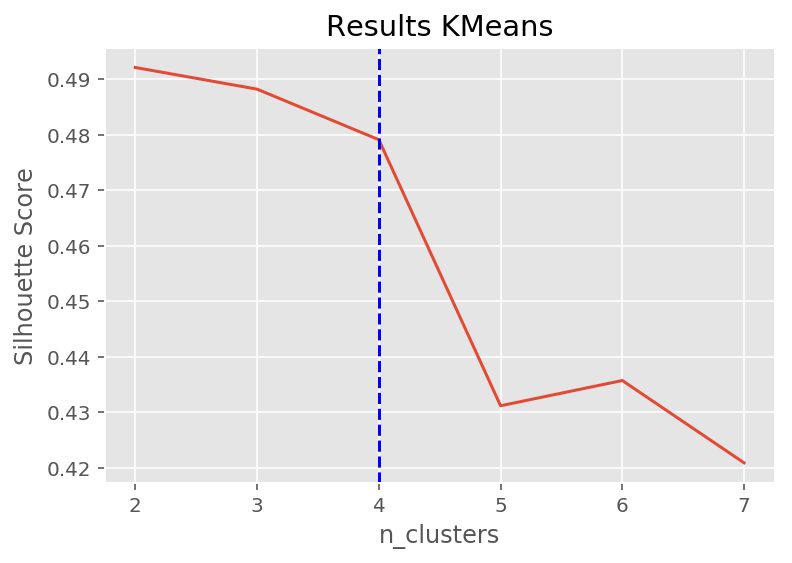

In [15]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

Схоже оптимальним є визначення 4-х сегментів клієнтів. Візуалізуємо їх:

In [16]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

print(centers)

[[-0.14642395  0.48919813  0.01620502]
 [-0.23543084 -0.24495861  0.21410451]
 [ 0.83647714 -0.02354299  0.05276964]
 [-0.08184467 -0.1716207  -0.26676112]]


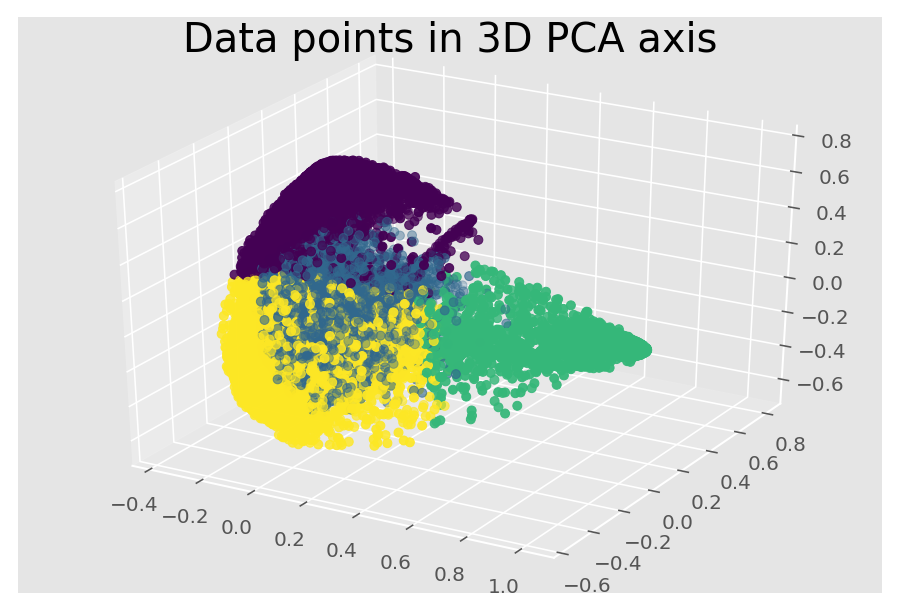

In [17]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

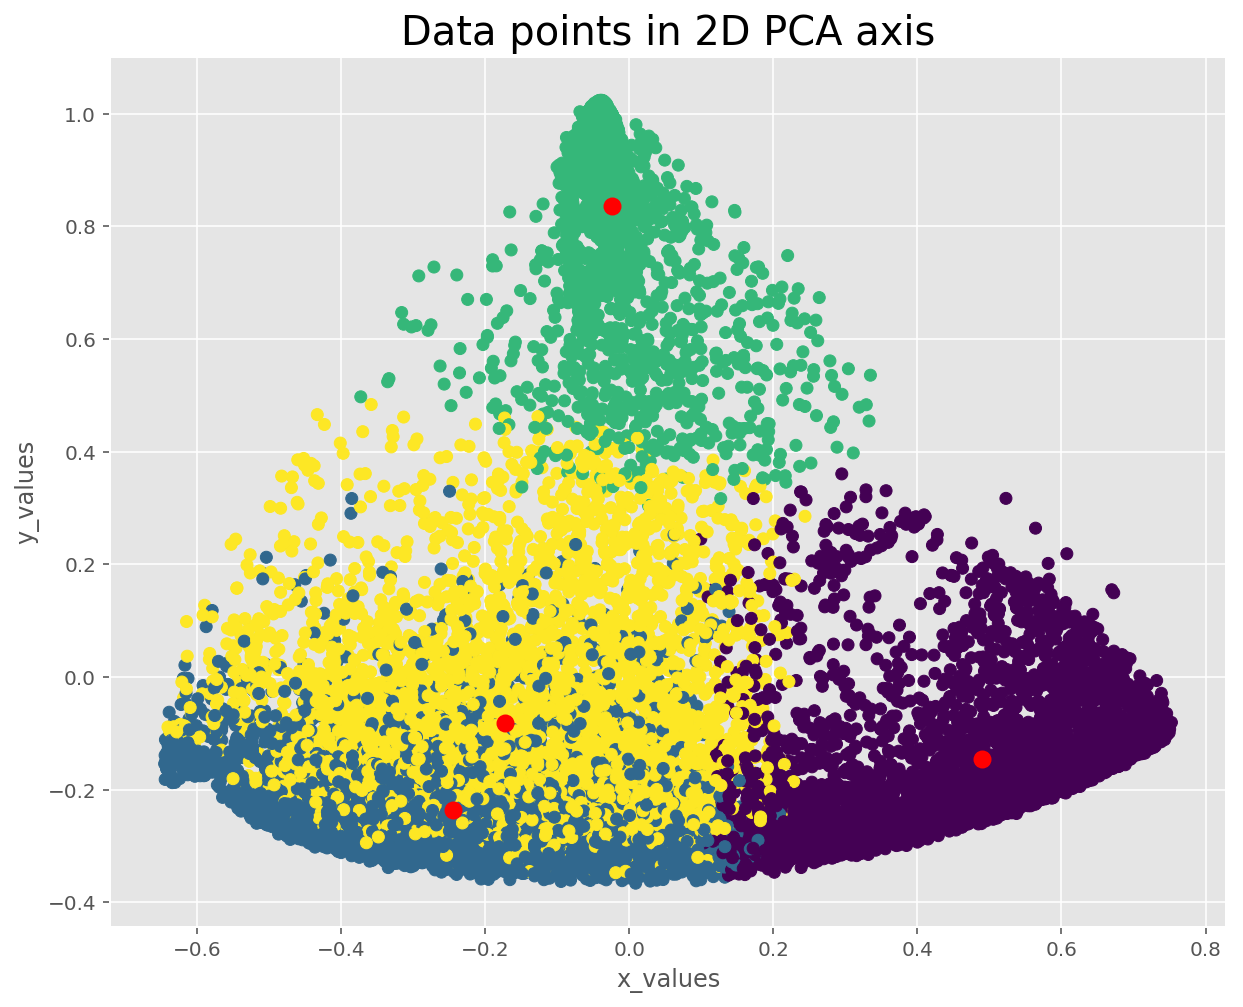

In [18]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [19]:
print(c_preds[:100])

[0 1 1 1 0 1 3 0 1 1 3 0 1 3 1 1 3 1 0 1 0 0 3 1 1 0 1 1 1 3 3 1 0 2 3 3 3
 1 3 1 2 0 1 3 0 1 1 0 3 1 0 1 1 3 1 0 3 3 1 1 1 2 2 1 1 3 2 0 0 2 0 3 2 3
 0 0 2 2 3 1 0 0 1 1 2 1 3 1 1 0 3 0 1 3 3 1 0 0 3 3]


In [20]:
# зафіксуємо результати сегментації в окремий файл
Y_clust = pd.DataFrame({
    "ID": features_last_months.index,
    "CLUSTER": c_preds.clip(0. ,20.)
})
Y_clust.to_csv("D:/data_sets/Kyivstar/BigDataSchool__Y_clust.csv", index=False)

In [21]:
# переглянемо ще раз перші значення результату сегментації
Y_clust = pd.read_csv('D:/data_sets/Kyivstar/BigDataSchool__Y_clust.csv', index_col = 0)
Y_clust.head()

,CLUSTER
ID,
2,0.0
4,1.0
5,1.0
8,1.0
9,0.0


#### Отже, ми отримали значення ID клієнта та його розрахований сегмент в окремому файлі.

#### На основі отриманої сегментаціїї можливо сформувати рекомендації щодо користування продуктами та послугами.